In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


In [25]:
df=pd.read_csv("C:/datasets/climate/CCPP_data.csv")
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


Features consist of hourly average ambient variables
- Temperature (AT) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization. 

In [26]:
df.shape

(9568, 5)

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is colected from and has effect on the Steam Turbine, the other three of the ambient variables effect the GT performance.

In [27]:
# Importing Libraries. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
import seaborn as sns

In [28]:
#summary statistics:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


* All the independent variables are numerical data type and it doesnt have any null values.
* The dependent variable is PE - Electrical energy ouput is also an numeric type without null values.
* Since, the value is numerical and contineous. So, Linear regression model is used to predict the value of the power.

In [29]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


* According to the statistical description, all the independent variables doesnt have any kind of outliers.
* This is identified by the mean value is close towards the 50% of the IQR value.

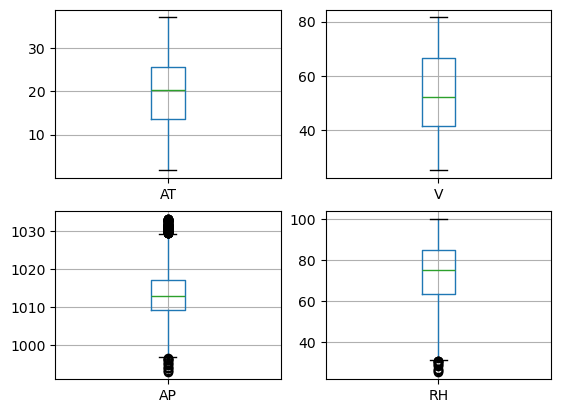

In [30]:
fig, axes = plt.subplots(2,2)
for i,el in enumerate(list(df.columns.values)[:-1]):
    a = df.boxplot(el, ax=axes.flatten()[i])


* From this we can say that AP and RH has some outliers.
* We need to analyze that wheather it is outlier or extreme values.

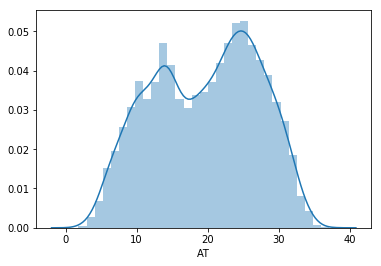

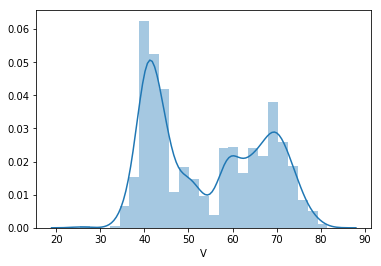

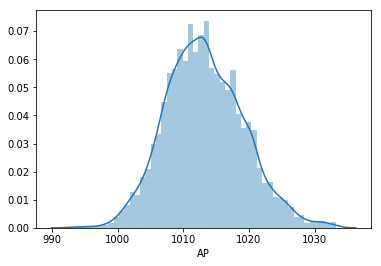

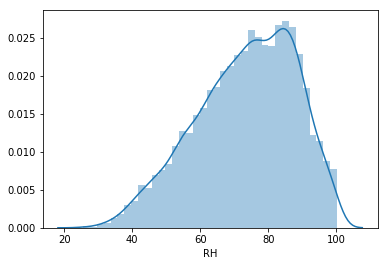

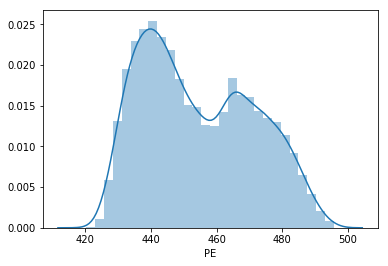

In [8]:
#checking for the distribution using violin plot:
for i in range(len(df.columns)):
    sns.distplot(df.iloc[:,i])
    plt.show()

* AT - Temperature is more or less normally distributed.
* AP - Pressure is normally distrubuted
* RH - Humidity is left skewed. 
* PE - It has 2 peaks with normally distributed plot.


          AT         V        AP        RH        PE
AT  1.000000  0.850620 -0.518790 -0.542706 -0.944412
V   0.850620  1.000000 -0.426129 -0.304938 -0.883702
AP -0.518790 -0.426129  1.000000  0.086776  0.542531
RH -0.542706 -0.304938  0.086776  1.000000  0.389640
PE -0.944412 -0.883702  0.542531  0.389640  1.000000
Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')


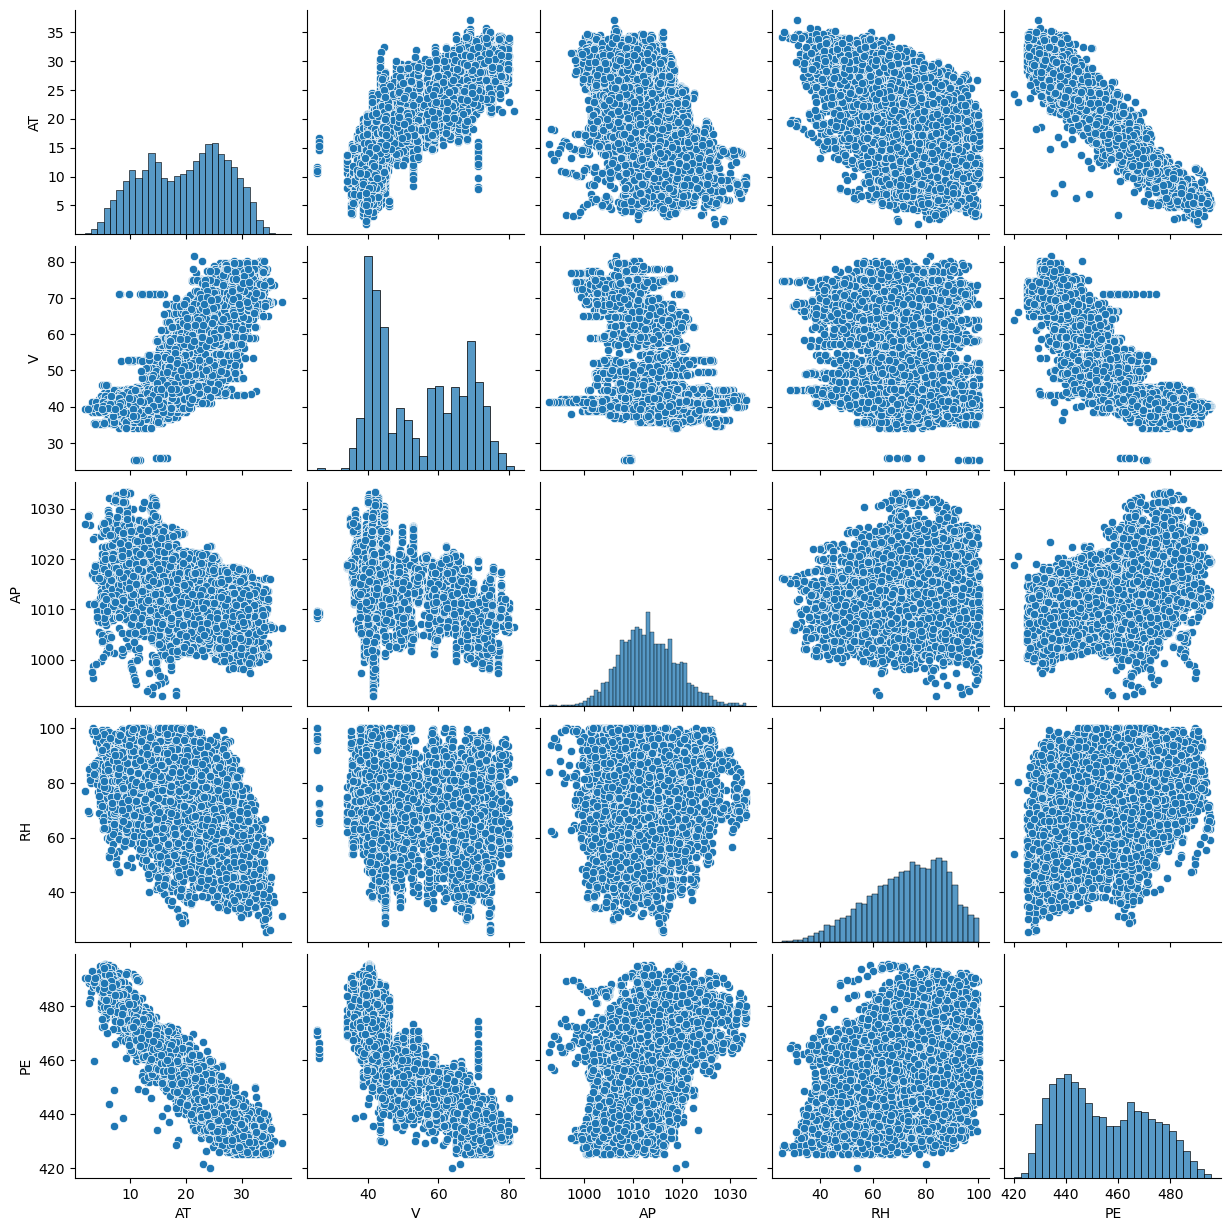

In [31]:
#checking linearity:
sns.pairplot(df)
print(df.corr(method="spearman"))

col=df.columns
print(col)

* Relation between AT vs V has strong positive correlation as 0.8 - says that temperature and vaccum has strong positive correlation.
* AT vs PE has strong negative correlation as -0.9 - says that temeperature vs electrical output as strong negative correlation. In which, ambient temperature increases the energy output is decreses. 
* V vs AT has strong positive correlation as 0.8
* V vs PE has strong negative correlation as -0.8 - In which, the exhaust vaccum is high then the energy output is very low and the vice versa

[[0.01327145 0.03704652 0.90848246 0.06491125 0.4109715 ]
 [0.02255748 0.05640267 0.91380205 0.05292677 0.39808852]
 [0.00452864 0.03491751 0.89700787 0.08165735 0.43297716]
 ...
 [0.02837471 0.06734011 0.91766641 0.03304947 0.38917383]
 [0.02209897 0.062695   0.91524765 0.05632168 0.39335807]
 [0.0193258  0.05593746 0.91012899 0.06072418 0.40555555]]
             0         1         2         3         4
0     0.013271  0.037047  0.908482  0.064911  0.410972
1     0.022557  0.056403  0.913802  0.052927  0.398089
2     0.004529  0.034918  0.897008  0.081657  0.432977
3     0.018812  0.051694  0.911079  0.069117  0.402655
4     0.009662  0.033488  0.901247  0.086282  0.423195
...        ...       ...       ...       ...       ...
9563  0.014887  0.044429  0.906642  0.081365  0.411320
9564  0.011683  0.034704  0.906715  0.059150  0.415966
9565  0.028375  0.067340  0.917666  0.033049  0.389174
9566  0.022099  0.062695  0.915248  0.056322  0.393358
9567  0.019326  0.055937  0.910129  0.060

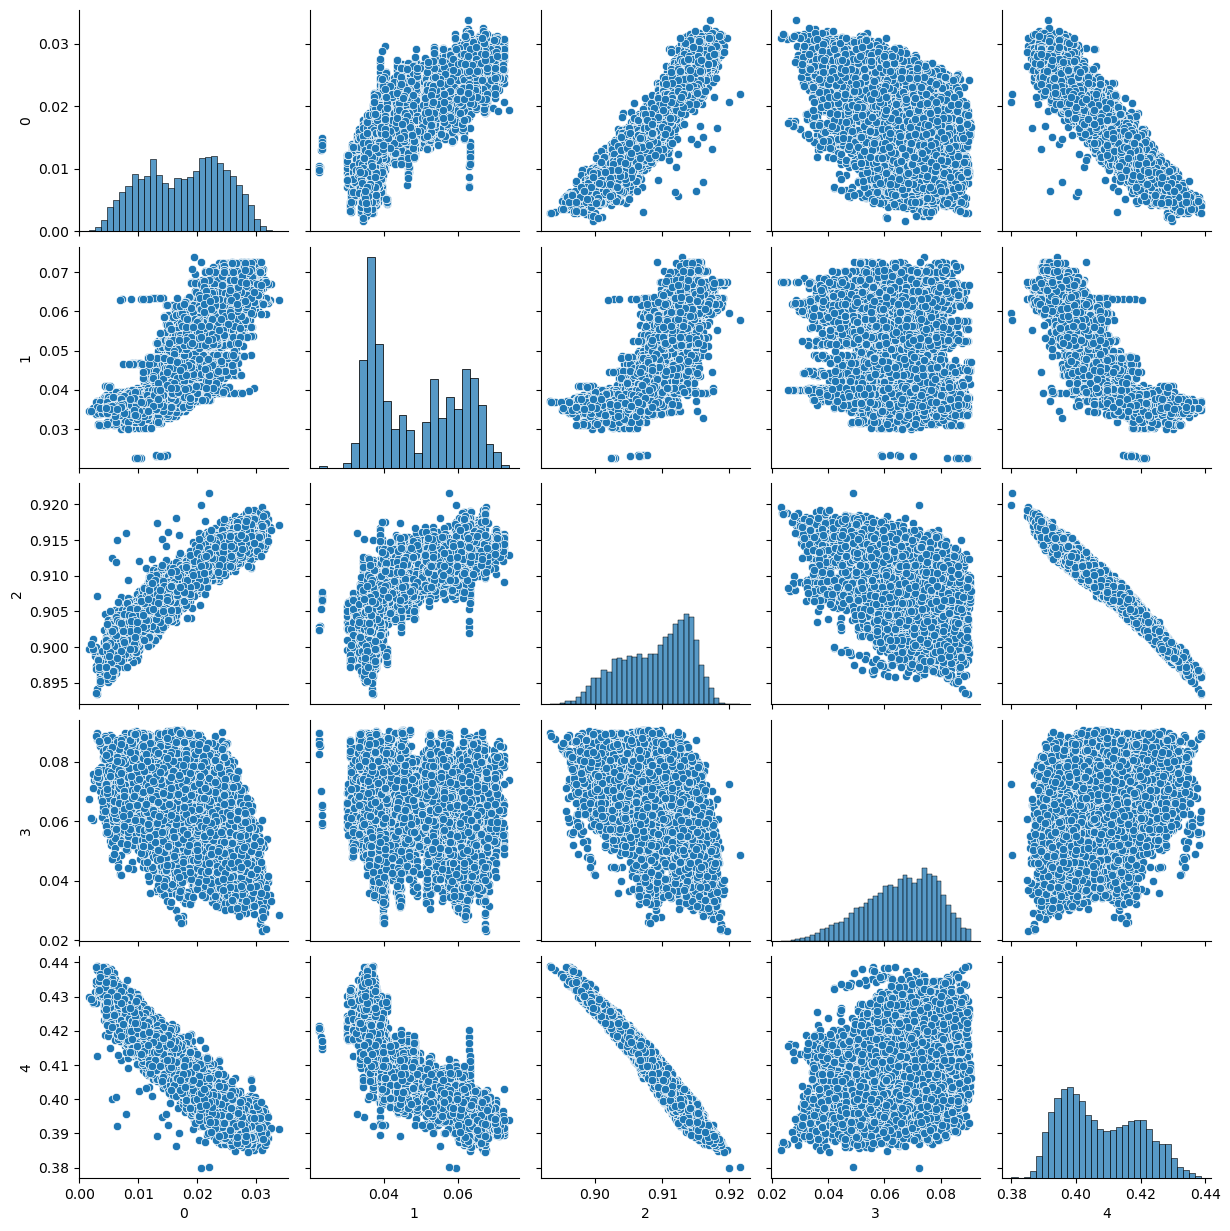

In [9]:
#normalizing the data:
df_nor=preprocessing.normalize(df)
print(df_nor)
df_nor=pd.DataFrame(df_nor)
print(df_nor)
sns.pairplot(df_nor)
df_nor.corr()
df_nor.columns = df.columns
df_nor.head()
x=df_nor.iloc[:,0:4]
y=df_nor.iloc[:,4]

* After normalizing the data,
    * The correlation of AP is showing a strong negative correlation.

In [32]:
#splitting train set:
X_train,X_test,y_train,y_test=model_selection.train_test_split(x,y,test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7654, 4)
(1914, 4)
(7654,)
(1914,)


In [35]:
#fitting linear model:
lm=linear_model.LinearRegression()
model=lm.fit(X_train,y_train)
#pred=lm.predict(X_train)
#print(pred)
#print(model.coef_)
#print(model.intercept_)


In [36]:
#checking accuracy:
from sklearn.metrics import r2_score
#print(r2_score(pred,y_train))
predd = lm.predict(X_test)
print(r2_score(predd,y_test))

0.9990393914621774


Text(0.5, 1.0, 'Observed vs. Predicted Values')

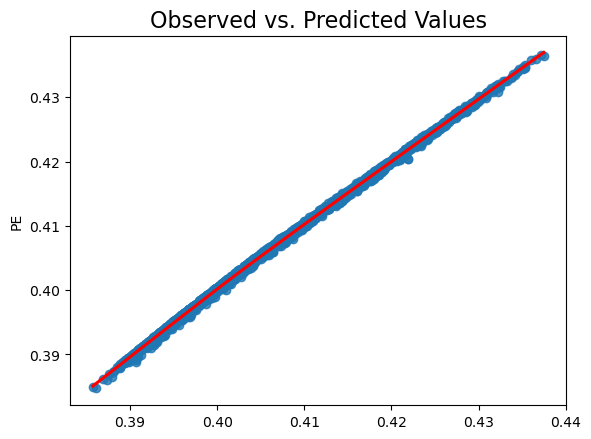

In [15]:
sns.regplot(x=predd, y=y_test, lowess=True, line_kws={'color': 'red'})
plt.title('Observed vs. Predicted Values', fontsize=16)
